Muniba Liaqat Ali Ali 1635042

Àngela Obón Soto 1600359

Josep Riballo Moreno 1606620
# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

In [1]:
### Imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder 
import seaborn as sns
import matplotlib.pyplot as plt

### **1. EDA (exploratory data analysis) (1 punt)**

Abans de resm cal sempre veure com es la base de dades asignada?

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
* Com es el target, quantes categories diferents existeixen?
* Tenim nans en les dades?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?


### **Quants atributs té la vostra base de dades?**

In [2]:
# Read DDBB
db_titanic = pd.read_csv('train.csv')

# Get num of atributes
num_atributes = db_titanic.shape[1]

print(f"Tenim {num_atributes} atributs en la nostra base de datos.")

Tenim 12 atributs en la nostra base de datos.


### **Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)**

In [3]:
# Get name of atributs
atribute_types = db_titanic.dtypes

print(f"\nEls tipus d'atributs són:\n{atribute_types}.")


Els tipus d'atributs són:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object.


### **Com es el target, quantes categories diferents existeixen?**

Si analitzem la nostra base de dades, arribem a la conclusió que ens hauríem de basar en l'atribut 'Survived'. Per tant, aquest és el nostre target. Aquest atribut té dues categories: Sí(1) o No(0), és a dir, si el passatger ha sobreviscut o no.

In [4]:
target = db_titanic['Survived']
categories= np.unique(target)

print(f"\n El target es l'atribut 'Survived' i té {len(categories)} categories i són {categories}")


 El target es l'atribut 'Survived' i té 2 categories i són [0 1]


### **Tenim nans en les dades?**

In [5]:
nans_per_column = db_titanic.isnull().sum()
print("\nValors nuls per columna:")
print(nans_per_column)


Valors nuls per columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Podem observar amb el resultat anterior, totes les dades NaNs que hi ha per cada columna. I en aquest cas destaquen els atributs 'Age' i 'Cabin'. 

### **Podeu veure alguna correlació entre X i y? (A l'hora de determinar l'atribut "Supervived")**

Considerem que hi han diferents atributs que no son necessaris a ultilitzar a l'hora de predir la supervivencia i llavors el que hem fet ha sigut eliminar-los. Els atributs eliminats han sigut: 
1. Name: Eliminada degut a que només ens indica el nom del passatger i no te cap rellevància a l'hora de predir la supervivencia. 
2. Ticket: L'eliminem ja que és un indicador del tiquet del passatger i no és rellevant. 
3. PassengerID: L'eliminem ja que és un identificador del passatger i tampoc no és rellevant.
4. Cabin: L'eliminem ja que és un indicador de la cabina de cada passatger i tampoc no és rellevant.

A continuació mostrem l'eliminació d'aquest atributs. 

In [6]:
# We delete the attributes that we don't need
# We will copy our db to another one and from there we will make the modifications 
# db_corr --> for the correlation

db_corr = db_titanic.copy()
delete_columns = []

for r in db_corr:
    if r == 'Name' or r == 'Ticket' or r == 'Cabin' or r == 'PassengerId':
        delete_columns.append(r)

db_corr.drop(delete_columns, axis='columns', inplace=True)
#Here we count the number of 0's and 1's
survived_count = db_corr['Survived'].value_counts()
total_inst = len(db_corr)

print(survived_count)
print(total_inst)
print(db_corr)


Survived
0    549
1    342
Name: count, dtype: int64
891
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [7]:
print("Now we count the numbers of 0's and 1's after we delete the nans")
db_corr1 = db_corr.dropna()
#With dropna() we delete all rows that contain at least one value

survived_count = db_corr1['Survived'].value_counts()
survived_total = len(db_corr1)

print(survived_count)
print(survived_total)
print(db_corr1)

Now we count the numbers of 0's and 1's after we delete the nans
Survived
0    424
1    288
Name: count, dtype: int64
712
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
885         0       3  female  39.0      0      5  29.1250        Q
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[712 rows x 8 columns]


Un cop hem eliminat les columnes mencionades, només ens quededen valors nuls a la columna Age, així que considerem que no cal eliminar tota la columna. Només esborrem aquelles files que tenen un valor nul a Age o a Embarked, i per tant, ara el conjunt de dades ha quedat reduït a 712 files. Aquí aprofitem per observar que les dades no estan equilibrades, ja que tenim 424 zeros i 288 uns. Tot i que la diferència sigui aproximadament de 150, si el volum de dades augmentés, el desequilibri seria molt més marcat.

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.356462 -0.082446 -0.015523  0.095265  0.266100   
Pclass     -0.356462  1.000000 -0.365902  0.065187  0.023666 -0.552893   
Age        -0.082446 -0.365902  1.000000 -0.307351 -0.187896  0.093143   
SibSp      -0.015523  0.065187 -0.307351  1.000000  0.383338  0.139860   
Parch       0.095265  0.023666 -0.187896  0.383338  1.000000  0.206624   
Fare        0.266100 -0.552893  0.093143  0.139860  0.206624  1.000000   
Sex_female  0.536762 -0.150826 -0.099037  0.106296  0.249543  0.182457   
Sex_male   -0.536762  0.150826  0.099037 -0.106296 -0.249543 -0.182457   
Embarked_C  0.195673 -0.279194  0.038268 -0.046227 -0.009523  0.301337   
Embarked_Q -0.048966  0.131989 -0.021693  0.051331 -0.009417 -0.062346   
Embarked_S -0.159015  0.197831 -0.025431  0.018968  0.013259 -0.250994   



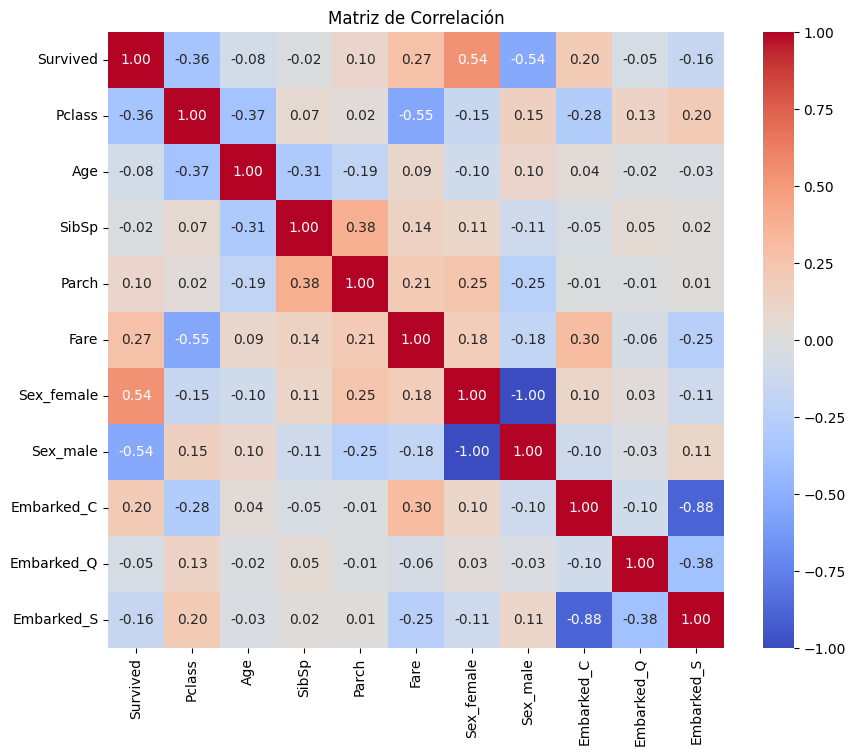

In [8]:
print(db_corr1.columns)

# Codificación one-hot para los atributos 'Sex' y 'Embarked', sin eliminar la primera categoría
db_corr_encoded = pd.get_dummies(db_corr1, columns=['Sex', 'Embarked'], drop_first=False)

# Ahora, podemos calcular la matriz de correlación
correlation_matrix = db_corr_encoded.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Si només observem l'atribut **Survived** (Supervivència) i la seva correlació amb la resta d'atributs, podem interpretar el següent:

1. **Pclass** (-0.36):
   - Hi ha una correlació negativa moderada entre la classe del passatger i la supervivència. Això vol dir que els passatgers de classes més baixes (amb un valor més alt de `Pclass`) tenien menys probabilitats de sobreviure.

2. **Age** (-0.08):
   - La correlació entre l'edat i la supervivència és negativa, però molt baixa, la qual cosa indica que l'edat no va tenir gaire impacte en les probabilitats de supervivència.

3. **SibSp** (-0.02):
   - La correlació entre el nombre de germans o cònjuges a bord i la supervivència és molt baixa i negativa. Això suggereix que tenir més germans o cònjuges a bord no va afectar gaire les probabilitats de sobreviure.

4. **Parch** (0.10):
   - Hi ha una correlació positiva molt baixa entre tenir pares o fills a bord i la supervivència. Això vol dir que tenir familiars propers va augmentar lleugerament les possibilitats de sobreviure, però no de manera significativa.

5. **Fare** (0.27):
   - Hi ha una correlació positiva moderada entre el preu del bitllet i la supervivència. Això indica que els passatgers que van pagar més (probablement en classes més altes) tenien més probabilitats de sobreviure.

6. **Sex_female** (0.54):
   - Hi ha una correlació positiva forta que indica que ser dona està fortament associat amb una major probabilitat de supervivència. Això reflecteix la política de "dones i nens primer" que es va aplicar durant el desastre del Titanic.

7. **Sex_male** (-0.54):
   - La correlació negativa forta mostra que ser home està fortament associat amb una menor probabilitat de supervivència, reforçant la mateixa idea que amb `Sex_female`.

8. **Embarked_C** (0.20):
   - Hi ha una correlació positiva baixa entre haver embarcat a (C) i la supervivència. Això podria indicar que els passatgers que van embarcar en aquest port tenien una lleugera avantatge a l’hora de sobreviure.

9. **Embarked_Q** (-0.05):
   - No hi ha pràcticament cap correlació entre haver embarcat a (Q) i la supervivència, suggerint que aquest atribut no va influir de manera significativa.

10. **Embarked_S** (-0.16):
    - Hi ha una correlació negativa baixa amb haver embarcat a (S), la qual cosa indica que els passatgers que van embarcar en aquest port tenien lleugerament menys probabilitats de sobreviure, encara que la relació no és molt forta.

**Conclusió**:
Els atributs que més influeixen en la supervivència, segons aquesta matriu de correlació, són **Sex_female** (ser dona augmenta la probabilitat de supervivència), **Sex_male** (ser home la disminueix), **Pclass** (estar en una classe més baixa redueix la probabilitat), i **Fare** (pagar més està associat a una major probabilitat de sobreviure).


### **Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?**


In [14]:
#print(db_corr_encoded)
balanced = db_corr_encoded['Survived'].value_counts()
total= len(db_corr_encoded)

print(balanced)
print(total)

Survived
0    424
1    288
Name: count, dtype: int64
712


La distribució de l'etiqueta **Survived** no està del tot balancejada:

- **0** (No va sobreviure): 424 persones
- **1** (Va sobreviure): 288 persones
- **Total**: 712 persones
 
Distribució de les etiquetes:
- Percentatge de **No supervivents**: 59.55%
- Percentatge de **Supervivents**: 40.45%

Tot i que no és una distribució extremadament desbalancejada, hi ha una diferència notable entre els dos grups (59.55% versus 40.45%).

### **2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)**
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
* Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica (no cal separar train-test) i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats . Aquestes funcions ens serviran mes endevant. Caldra tambe triar la metrica que farem servir despres per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?
* Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

Nota: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'unic que es valora es l'eleccio de la metrica de classificacio aixi com saber quin tipus de grafiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la metrica d'error que es fara servir, i es una decisio que cal pendre previa a entrenar models

### 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)


### 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

* Com creieu que es podria millorar el vostre model?